In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Climate Change: Earth Surface Temperature Data

Exploring global temperatures since 1750. Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science. We are turning some of the data over to you so you can form your own view.

In [2]:
# Load in the data set
climate = pd.read_csv('/home/yungshun/workspace/py3/feature-understanding/datasets/GlobalLandTemperaturesByCity.csv')

In [3]:
# View the first few rows and the headers
climate.head(4)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
# Get a sense of how many rows of data there are, if there are any missing values, and what data type each column has
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [5]:
# Another method to check for missing values
climate.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [6]:
# Show descriptive stats
climate.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [7]:
# Here we will remove the columns that contain those missing values for now
climate.dropna(axis=0, inplace=True)

### Quantitative data

In [8]:
climate['Latitude'] = climate['Latitude'].map(lambda value: value.replace('N', '').replace('S', ''))

In [9]:
climate['Longitude'] = climate['Longitude'].map(lambda value: value.replace('E', '').replace('W', ''))

In [10]:
climate['Longitude'] = climate['Longitude'].astype(float)

In [11]:
climate['Latitude'] = climate['Latitude'].astype(float)

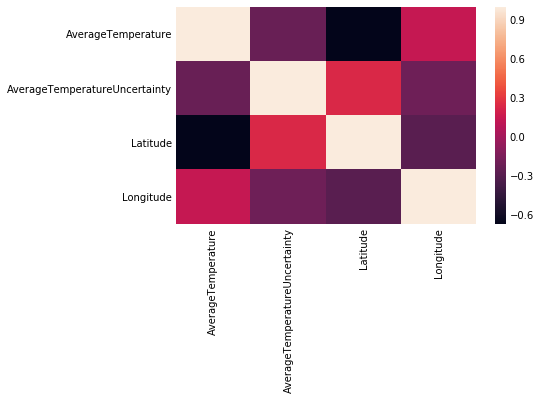

In [12]:
sns.heatmap(climate.corr())

### Qualitative data

In [13]:
# Convert the dt column to datetime and extract the year
climate['dt'] = pd.to_datetime(climate['dt'])
climate['year'] = climate['dt'].map(lambda value: value.year)

### Interval level

In [14]:
# Country (nominal) - AverageTemperature (Interval)

Text(0.5,1,'Max Avg Temp by Country')

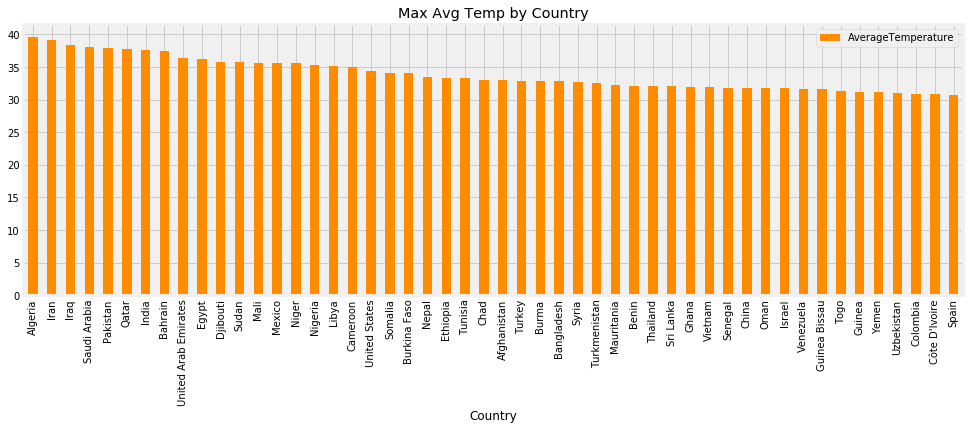

In [15]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

climate.groupby('Country')[['AverageTemperature']].max().sort_values(
    'AverageTemperature', ascending=False).head(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max Avg Temp by Country')

In [16]:
# Year (Interval) - AverageTemperature (Interval)

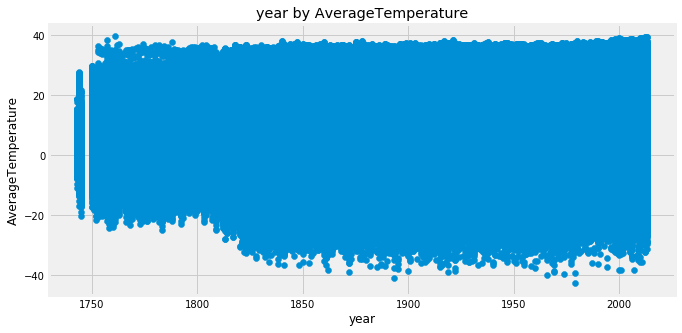

In [17]:
x = climate['year']
y = climate['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
ax.set_xlabel('year')
ax.set_ylabel('AverageTemperature')
ax.set_title('year by AverageTemperature')
plt.show()

In [18]:
# Subset the data to just the US
climate_sub_us = climate.loc[climate['Country'] == 'United States']

In [19]:
# Year (Interval) - AverageTemperature (Interval)

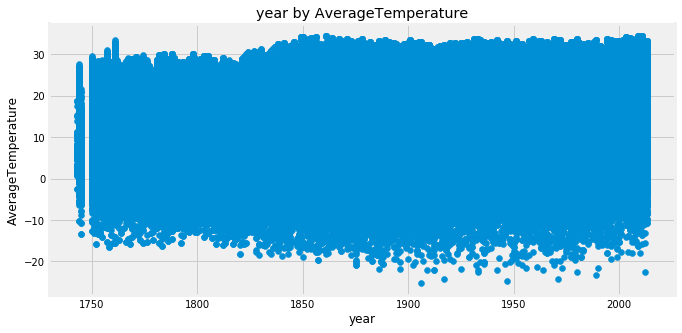

In [20]:
x = climate_sub_us['year']
y = climate_sub_us['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
ax.set_xlabel('year')
ax.set_ylabel('AverageTemperature')
ax.set_title('year by AverageTemperature')
plt.show()

In [21]:
# City (nominal) - AverageTemperature (Interval)

Text(0.5,1,'Max Avg Temp by US City')

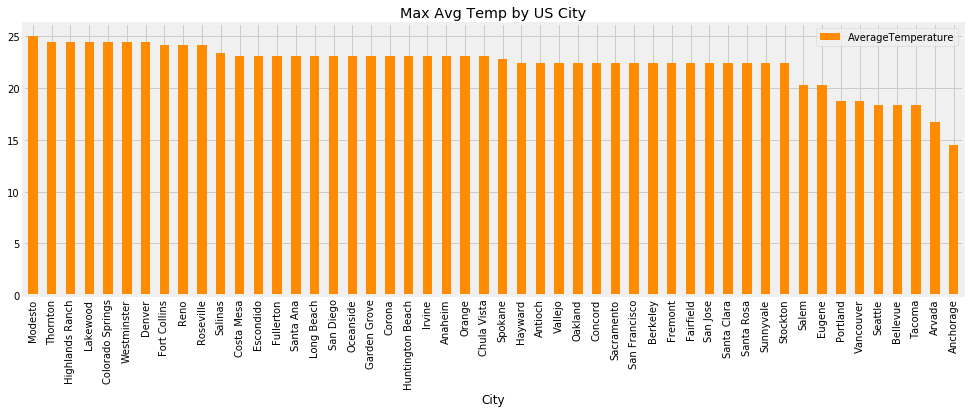

In [22]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

climate_sub_us.groupby('City')[['AverageTemperature']].max().sort_values(
    'AverageTemperature', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max Avg Temp by US City')